**Homework 4 Spring 202**

Your Name - David Palumbo  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")
import sklearn

# PART 2 CIFAR 10 Dataset

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

In [3]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

In [4]:
LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

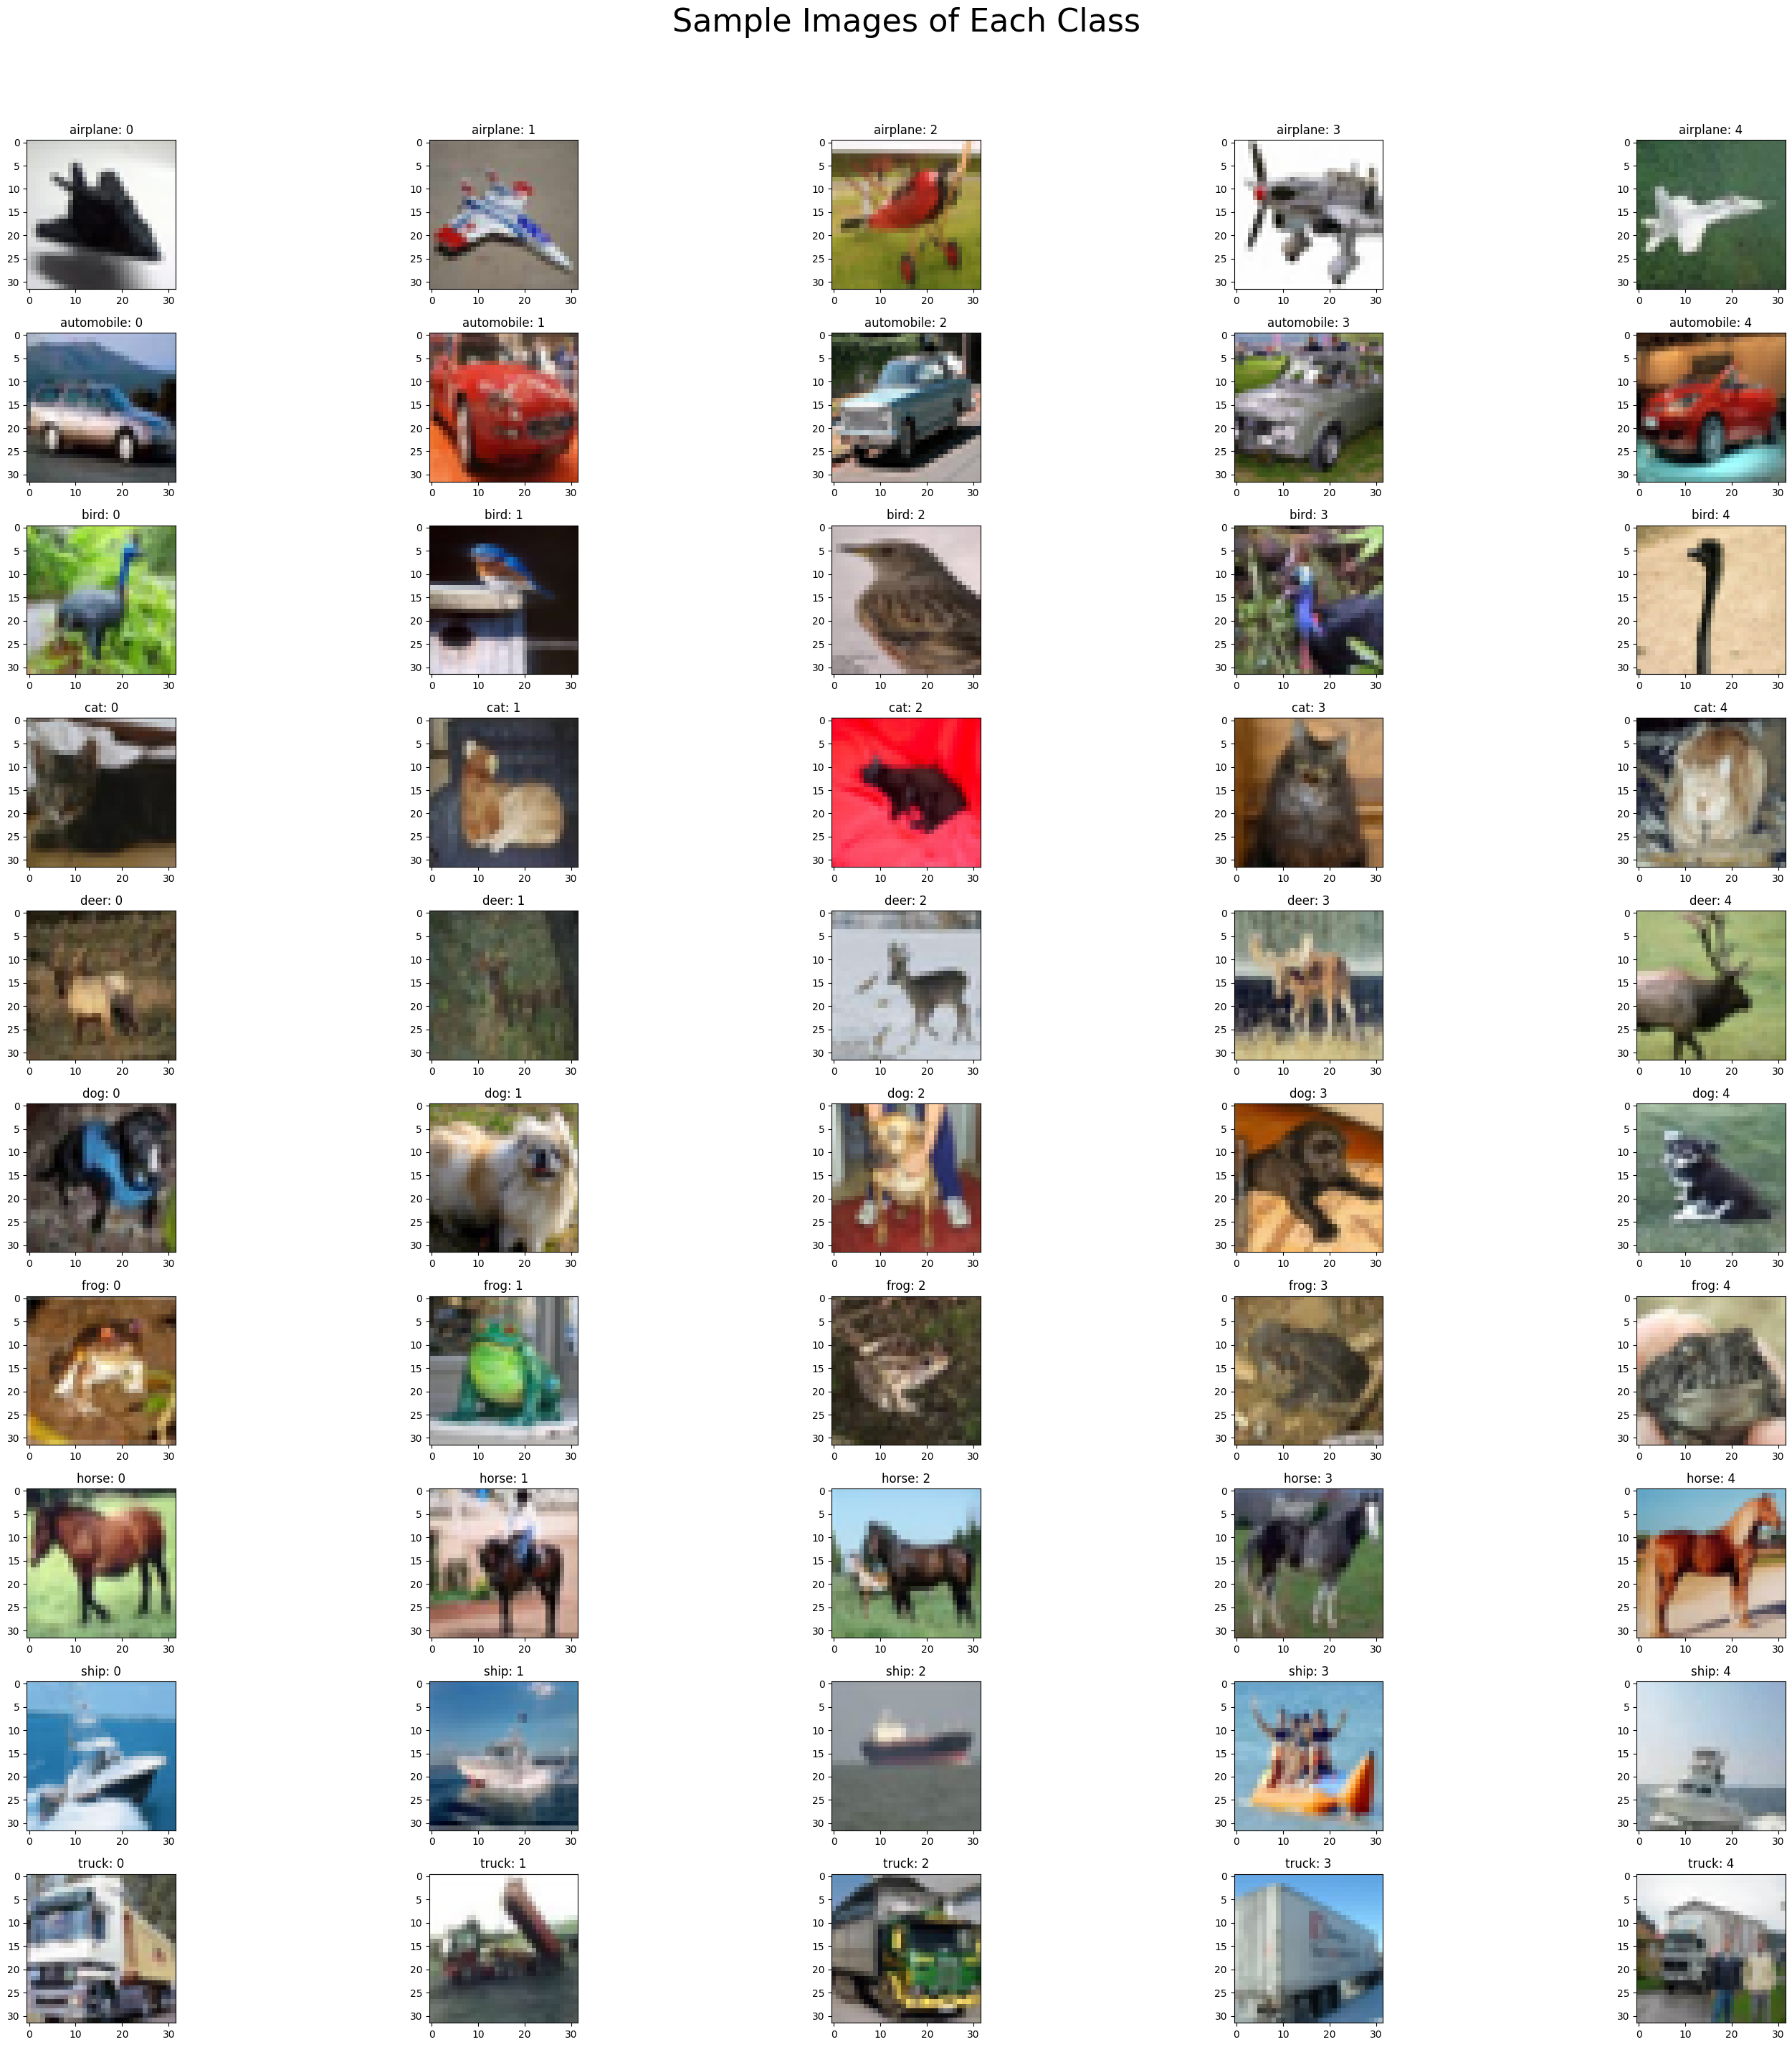

In [5]:
#Your code here
ncols = 5

# Start by making a list of arrays
# Each outter list refers to a given label
# Each array is all the indexs of images that have that label
dev_label_list = []
for i in range(0, len(LABELS)):
  dev_label_list.append(np.where(y_dev == i)[0])

img_samples = []
for i in range(0,len(LABELS)):
  img_samples.append([])
  for j in range(0, ncols):
    if j >= len(dev_label_list[i]):
      break
    img_samples[i].append(x_dev[dev_label_list[i][j]])

fig, ax = plt.subplots(len(LABELS), ncols, figsize=(30,30))
for label_num in range(0, len(LABELS)):
  for sample_num in range(0, ncols):
    img_name = LABELS[label_num] + ": " + str(sample_num)
    ax[label_num, sample_num].imshow(img_samples[label_num][sample_num])
    ax[label_num, sample_num].set_title(img_name)
    ax[label_num, sample_num].grid(False)

fig.suptitle("Sample Images of Each Class", fontsize=32)
fig.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

2.2  Preparing the dataset for CNN 

1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [6]:
#Your code here
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Part 1 - Shapes
x_dev_shape = x_dev.shape
y_dev_shape = y_dev.shape
x_test_shape = x_test.shape
y_test_shape = y_test.shape
print("Dataset Shapes --")
print("x_dev Shape: \t", x_dev_shape)
print("y_dev Shape: \t", y_dev_shape)
print("x_test Shape: \t", x_test_shape)
print("y_test Shape: \t", y_test_shape)

# Part 2 - Flatten
x_dev_flat = x_dev.reshape(x_dev_shape[0], -1)
y_dev_flat = y_dev.reshape(y_dev_shape[0], -1)
x_test_flat = x_test.reshape(x_test_shape[0], -1)
y_test_flat = y_test.reshape(y_test_shape[0], -1)
x_dev_flat_shape = x_dev_flat.shape
y_dev_flat_shape = y_dev_flat.shape
x_test_flat_shape = x_test_flat.shape
y_test_flat_shape = y_test_flat.shape
print("After Flatten --")
print("x_dev Shape: \t", x_dev_flat_shape)
print("y_dev Shape: \t", y_dev_flat_shape)
print("x_test Shape: \t", x_test_flat_shape)
print("y_test Shape: \t", y_test_flat_shape)

## Part 3 - Standardize
scalar  = StandardScaler()
x_dev_flat   = scalar.fit_transform(x_dev_flat)
x_test_flat  = scalar.fit_transform(x_test_flat)

## Part 4 - Train/Val Split 
x_train_flat, x_val_flat, y_train_flat, y_val_flat = train_test_split(x_dev_flat, y_dev_flat, test_size=0.2, random_state=42)

print("Shapes After Split --")
print("x_train shape: \t", x_train_flat.shape)
print("y_train shape: \t", y_train_flat.shape)
print("x_val shape: \t", x_val_flat.shape)
print("y_val shape: \t", y_val_flat.shape)

Dataset Shapes --
x_dev Shape: 	 (50000, 32, 32, 3)
y_dev Shape: 	 (50000, 1)
x_test Shape: 	 (10000, 32, 32, 3)
y_test Shape: 	 (10000, 1)
After Flatten --
x_dev Shape: 	 (50000, 3072)
y_dev Shape: 	 (50000, 1)
x_test Shape: 	 (10000, 3072)
y_test Shape: 	 (10000, 1)
Shapes After Split --
x_train shape: 	 (40000, 3072)
y_train shape: 	 (40000, 1)
x_val shape: 	 (10000, 3072)
y_val shape: 	 (10000, 1)


2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [7]:
#Your code here
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Activation
input_shape = x_train_flat[0].shape
output_size = len(LABELS)
model = Sequential([
    Dense(128, input_shape=(input_shape)),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(output_size),
    Activation('softmax')
])

2.4) Print out the model summary. Can show show the calculation for each layer for estimating the number of parameters

In [8]:
#Your code here
model.summary()

""" 
Calculations:
Images are 3072 parameters plus bias
First layer has 128 nodes, so 3073*128 calculations -> 393344
Second layer has 128 input values (plus bias value) into 64 nodes so 129*64 calculations -> 8256
Last layer has 64 input values (plus bias value) into 10 nodes so 65*10 calculations -> 650
Overal: 393344 + 8256 + 650 = 402250 parametsrs 
"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trai

' \nCalculations:\nImages are 3072 parameters plus bias\nFirst layer has 128 nodes, so 3073*128 calculations -> 393344\nSecond layer has 128 input values (plus bias value) into 64 nodes so 129*64 calculations -> 8256\nLast layer has 64 input values (plus bias value) into 10 nodes so 65*10 calculations -> 650\nOveral: 393344 + 8256 + 650 = 402250 parametsrs \n'

2.5) Do you think this number is dependent on the image height and width? 

In [1]:
# Your text here
""" 
Yes, see calculation comment above on question 2.4.
The number of "parameters" per image is essentially the number of pixels in the image (height x width)
"""

' \nYes, see calculation comment above on question 2.4.\nThe number of "parameters" per image is essentially the number of pixels in the image (height x width)\n'

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output equal to 1 upto two decimal places?**

In [10]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(x_train_flat[0].reshape(1,-1))

# print(output)
print("Output: {:.2f}".format(sum(output[0])))

1/1 [==============================] - 0s 211ms/step
Output: 1.00


2.6) Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs with batch size 128.

In [11]:
#Your code here
import time
from tensorflow.keras.utils import to_categorical

epoch_num = 20
batch_size = 128

print("--Adjusting Labels--")
num_labels = len(LABELS)
y_train_one_hot = to_categorical(y_train_flat, num_classes=num_labels)
y_val_one_hot = to_categorical(y_val_flat, num_labels)

start = time.perf_counter()
print("--Compiling Model--")
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
print("--Fiting Model--")
history_callback = model.fit(
    x=x_train_flat,
    y=y_train_one_hot,
    batch_size=batch_size,
    epochs=epoch_num,
    verbose="auto",
    validation_data=(x_val_flat, y_val_one_hot),
)
end = time.perf_counter()

print("Time to compile and train model (s): \t", end-start)
print("Time to compile and train model (m): \t", (end-start)/60)

--Adjusting Labels--
--Compiling Model--
--Fiting Model--
Epoch 1/20
313/313 [==============================] - 4s 9ms/step - loss: 1.7880 - accuracy: 0.3788 - val_loss: 1.6358 - val_accuracy: 0.4287
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 1.5351 - accuracy: 0.4619 - val_loss: 1.5953 - val_accuracy: 0.4394
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 1.4199 - accuracy: 0.5000 - val_loss: 1.5140 - val_accuracy: 0.4760
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 1.3457 - accuracy: 0.5274 - val_loss: 1.4992 - val_accuracy: 0.4810
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 1.2767 - accuracy: 0.5514 - val_loss: 1.4961 - val_accuracy: 0.4865
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 1.2288 - accuracy: 0.5705 - val_loss: 1.4929 - val_accuracy: 0.4873
Epoch 7/20
313/313 [==============================] - 3s 8ms/step - loss: 1.1732 - accurac

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

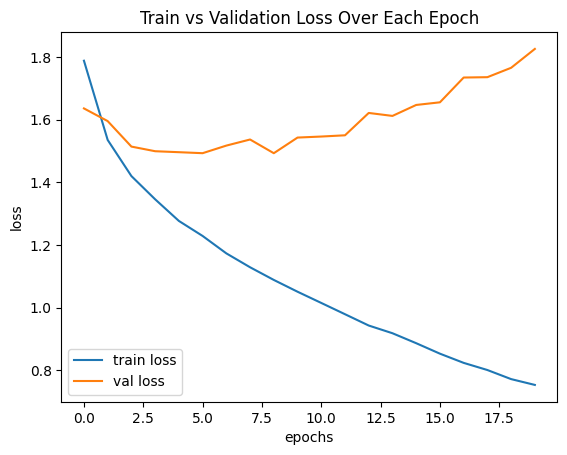

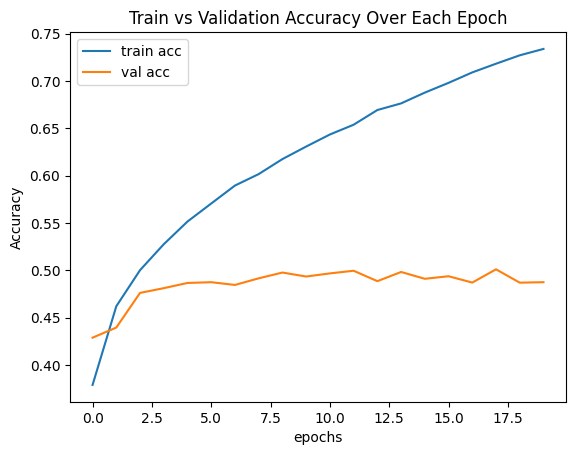

In [12]:
#Your code here
import pandas as pd
hist = pd.DataFrame(history_callback.history)

plt.plot(hist.index, hist["loss"], label="train loss")
plt.plot(hist.index, hist["val_loss"], label="val loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Train vs Validation Loss Over Each Epoch")
plt.legend()
plt.show()

plt.plot(hist.index, hist["accuracy"], label="train acc")
plt.plot(hist.index, hist["val_accuracy"], label="val acc")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.title("Train vs Validation Accuracy Over Each Epoch")
plt.show()

2.8) Finally, report the metric chosen on test set.

In [13]:
#Your code here
y_test_one_hot = to_categorical(y_test_flat, num_classes=num_labels)
score = model.evaluate(x_test_flat, y_test_one_hot, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 1.819
Test Accuracy: 0.484


2.9 If the accuracy achieved is quite less(<50%), try improve the accuracy [Open ended question, you may try different approaches]

In [20]:
#Your code here
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

""" 
Try to do it with hyperparameter tuning.
Hyperparameters to choose: Num Epochs, First Hidden Layer Depth, Second Hidden Layer Depth
"""

def make_model(optimizer="adam", hidden_size1=128, hidden_size2=64):
    model = Sequential([
        Dense(hidden_size1, input_shape=(input_shape)),
        Activation('relu'),
        Dense(hidden_size2),
        Activation('relu'),
        Dense(output_size),
        Activation('softmax')
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

param_grid = {'epochs': [10, 20, 30],
              'hidden_size1': [96, 128, 256],
              'hidden_size2': [32, 64, 96]}

## Was getting some errors with the wrapper, so I choose to just do it manually
# clf = KerasClassifier(make_model, random_state=42)
# print(clf.get_params().keys())

# grid = GridSearchCV(clf, param_grid=param_grid, return_train_score=True)

# y_dev_one_hot = to_categorical(y_dev_flat, num_classes=num_labels)
# grid.fit(x_dev_flat, y_dev_one_hot)

# res = pd.DataFrame(grid.cv_results_)
# res.pivot_table(index=["param_epochs", "param_hidden_size"],
#                 values=["mean_train_score", "mean_test_score"]) 

y_dev_one_hot = to_categorical(y_dev_flat, num_classes=num_labels)
scores = np.zeros((3,3,3))
print("Starting hyperparameter turning with the following parameters: \n", param_grid)
start = time.perf_counter()
for i, ep in enumerate(param_grid['epochs']):
    print("Training with:  ", ep, "epochs.")
    for j, hs1 in enumerate(param_grid['hidden_size1']):
        for k, hs2 in enumerate(param_grid['hidden_size2']):
            temp_model = make_model(hidden_size1=hs1, hidden_size2=hs2)
            history_callback = temp_model.fit(
                x=x_train_flat,
                y=y_train_one_hot,
                batch_size=batch_size,
                epochs=ep,
                verbose=0,
                validation_data=(x_val_flat, y_val_one_hot),
            )
            hist = pd.DataFrame(history_callback.history)
            val_acc = hist["val_accuracy"][ep-1]
            scores[i,j,k] = val_acc

end = time.perf_counter()
print("Time to tuning hyperparmeters (s): \t", end-start)
print("Time to tuning hyperparmeters (m): \t", (end-start)/60)

# Report on best parameters
print("Param Grid: \n", param_grid)
print("Validation Set Accuracy Scores:", )
print("Epochs: ", param_grid['epochs'][0], " (scores by hidden_size1 by hidden_size2): \n", scores[0])
print("Epochs: ", param_grid['epochs'][1], " (scores by hidden_size1 by hidden_size2): \n", scores[1])
print("Epochs: ", param_grid['epochs'][2], " (scores by hidden_size1 by hidden_size2): \n", scores[2])

inds = np.argmax(scores.flatten())
new_i = int(inds / (3*3))
new_k = inds % 3
new_j = int(inds % (3*3) /3)
best_params = {'epochs': param_grid['epochs'][new_i],
               'hidden_size1': param_grid['hidden_size1'][new_j],
               'hidden_size2': param_grid['hidden_size2'][new_k]}
# best_params = grid.best_params_
print("Best Parameters: ", best_params)

Starting hyperparameter turning with the following parameters: 
 {'epochs': [10, 20, 30], 'hidden_size1': [96, 128, 256], 'hidden_size2': [32, 64, 96]}
Training with:   10 epochs.
Training with:   20 epochs.
Training with:   30 epochs.
Time to tuning hyperparmeters (s): 	 1721.9152005999995
Time to tuning hyperparmeters (m): 	 28.698586676666658
Param Grid: 
 {'epochs': [10, 20, 30], 'hidden_size1': [96, 128, 256], 'hidden_size2': [32, 64, 96]}
Validation Set Accuracy Scores:
Epochs:  10  (scores by hidden_size1 by hidden_size2): 
 [[0.49419999 0.4914     0.50190002]
 [0.49110001 0.4919     0.4921    ]
 [0.50830001 0.50040001 0.4998    ]]
Epochs:  20  (scores by hidden_size1 by hidden_size2): 
 [[0.48609999 0.48969999 0.48370001]
 [0.47690001 0.49309999 0.4867    ]
 [0.48840001 0.5011     0.493     ]]
Epochs:  30  (scores by hidden_size1 by hidden_size2): 
 [[0.46529999 0.47839999 0.47999999]
 [0.4869     0.48390001 0.4745    ]
 [0.47909999 0.4912     0.48660001]]
Best Parameters:  {'e

2.10 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

In [21]:
#Your code here
# Train the model
best_model = make_model(hidden_size1=best_params['hidden_size1'], hidden_size2=best_params['hidden_size2'])
best_ep = hidden_size1=best_params['epochs']
history_callback = best_model.fit(
    x=x_dev_flat,
    y=y_dev_one_hot,
    batch_size=batch_size,
    epochs=epoch_num,
    verbose="auto",
)

Epoch 1/20
391/391 [==============================] - 6s 14ms/step - loss: 1.8205 - accuracy: 0.3677
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 1.5546 - accuracy: 0.4563
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 1.4291 - accuracy: 0.4945
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 1.3527 - accuracy: 0.5235
Epoch 5/20
391/391 [==============================] - 5s 13ms/step - loss: 1.2879 - accuracy: 0.5424
Epoch 6/20
391/391 [==============================] - 6s 15ms/step - loss: 1.2386 - accuracy: 0.5620
Epoch 7/20
391/391 [==============================] - 6s 15ms/step - loss: 1.1902 - accuracy: 0.5787
Epoch 8/20
391/391 [==============================] - 5s 14ms/step - loss: 1.1459 - accuracy: 0.5938
Epoch 9/20
391/391 [==============================] - 6s 14ms/step - loss: 1.1052 - accuracy: 0.6071
Epoch 10/20
391/391 [==============================] - 6s 14ms/step - loss: 1.0656 - accura

2/2 [==============================] - 0s 4ms/step


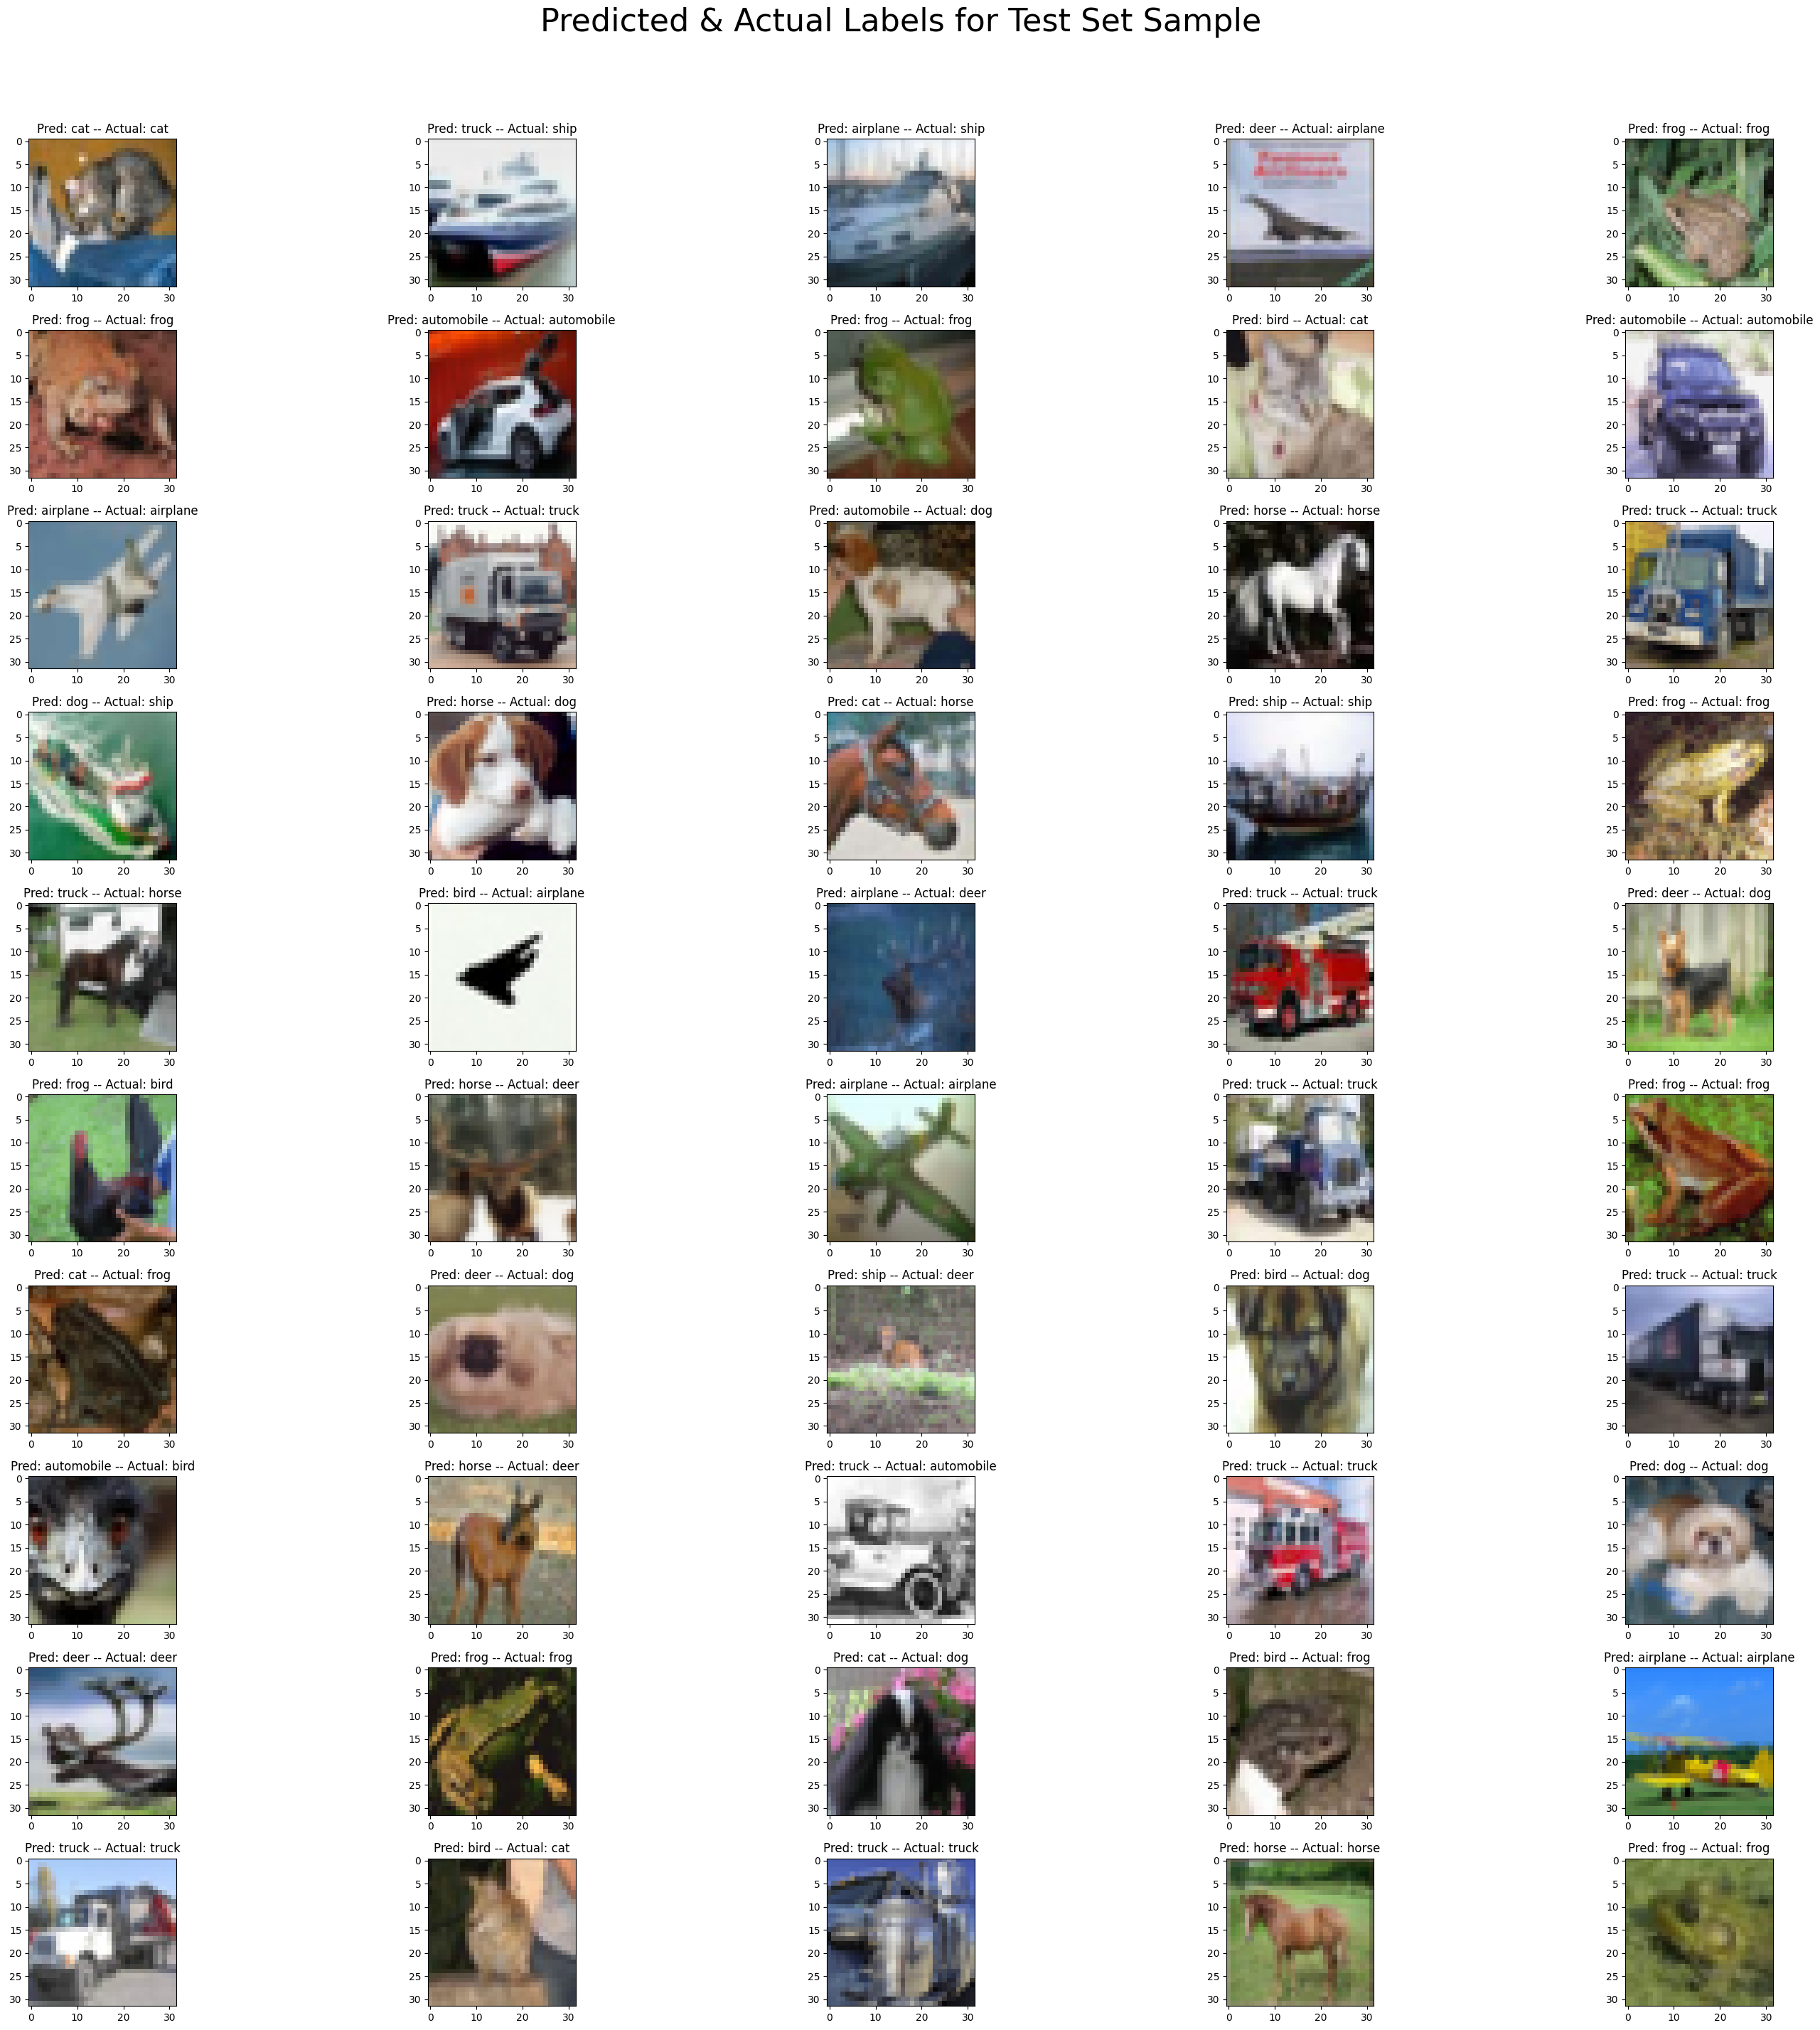

In [32]:
#Your code here
num_samples = 50
samples = x_test_flat[:num_samples]
samples_labels = y_test_flat[:num_samples].reshape((num_samples,))

output = best_model.predict(samples)
output_labels = np.argmax(output, axis=1)

# Display some outputs
num_display_rows = 10
num_display_cols = int(num_samples/num_display_rows)
fig, ax = plt.subplots(num_display_rows, num_display_cols, figsize=(30,30))
for display_row_num in range(0, num_display_rows):
  for display_col_num in range(0, num_display_cols):
    sample_num = int(num_display_cols*display_row_num + display_col_num)
    proper_label_str = LABELS[samples_labels[sample_num]]
    predicted_label_str = LABELS[output_labels[sample_num]]
    
    img_name = "Pred: " + predicted_label_str + " -- Actual: " + proper_label_str
    ax[display_row_num, display_col_num].imshow(x_test[sample_num])
    ax[display_row_num, display_col_num].set_title(img_name)
    ax[display_row_num, display_col_num].grid(False)

fig.suptitle("Predicted & Actual Labels for Test Set Sample", fontsize=32)
fig.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

# PART 3 Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [34]:
from tensorflow.keras.datasets import cifar10
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)


x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)


In [35]:
# your code here
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

""" 
With the above description, it is not possible to get to step 5 and have a vector, due to starting with 32x32 images.
See calculations:
    1) Same padding result -> 32x32
    2) Pooling halves it -> 16x16
    3) Conv without padding will drop 4 rows/cols -> 12x12
    4) Pooling halves it again -> 6x6
    5) Conv without padding will drop 4 rows/cols again -> 2x2
    (we wanted 1x1)
Waiting on Edstem response to question (https://edstem.org/us/courses/28797/discussion/2202160), but if that doesn't happen in time,
will have to fix in some other way.  One fix is making sure that the output of the first step is 28x28
See:
    1) First step output -> 28x28
    2) Pooling halves it -> 14x14
    3) Conv without padding will drop 4 rows/cols -> 10x10
    4) Pooling halves it again -> 5x5
    5) Conv without padding will drop 4 rows/cols again -> 1x1
There are two main ways to do this:
    - Crop input images
    - Remove padding in first layer
Until I get a response, I will simply remove the padding in the first layer, so that we get the desired output size.    
"""

input_shape = X_train[0].shape
print("input shape: ", input_shape)
cnn = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', padding="valid", strides=(1,1), input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu', padding="valid"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(120, kernel_size=(5, 5), activation='relu', padding="valid"),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(output_size, activation='softmax'),    
])

input shape:  (32, 32, 3)


3.2 Report the model summary 

In [36]:
#your code here
cnn.summary()

Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)             

3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot a separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

-- Starting Hyperparmeter Tuning --
Epoch 1/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6741 - accuracy: 0.3855 - val_loss: 1.4877 - val_accuracy: 0.4533
Epoch 2/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.4132 - accuracy: 0.4904 - val_loss: 1.3833 - val_accuracy: 0.4989
Epoch 3/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.2960 - accuracy: 0.5404 - val_loss: 1.2542 - val_accuracy: 0.5524
Epoch 4/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.2126 - accuracy: 0.5693 - val_loss: 1.2342 - val_accuracy: 0.5548
Epoch 5/20
1250/1250 [==============================] - 18s 15ms/step - loss: 1.1542 - accuracy: 0.5896 - val_loss: 1.1974 - val_accuracy: 0.5770
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1007 - accuracy: 0.6077 - val_loss: 1.1551 - val_accuracy: 0.5953
Epoch 7/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.0651 - a

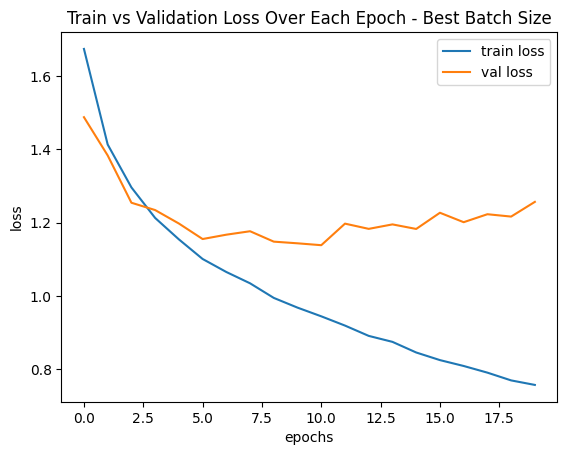

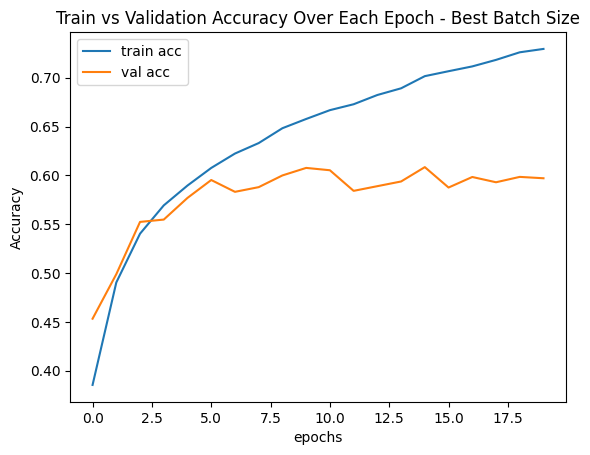

-- Training Main Model --
Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9244 - accuracy: 0.6994 - val_loss: 1.5735 - val_accuracy: 0.5743
Epoch 2/20
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7415 - accuracy: 0.7460 - val_loss: 1.5349 - val_accuracy: 0.5754
Epoch 3/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7027 - accuracy: 0.7538 - val_loss: 1.5405 - val_accuracy: 0.5807
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6796 - accuracy: 0.7623 - val_loss: 1.5700 - val_accuracy: 0.5754
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6663 - accuracy: 0.7675 - val_loss: 1.5407 - val_accuracy: 0.5783
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6518 - accuracy: 0.7701 - val_loss: 1.5655 - val_accuracy: 0.5812
Epoch 7/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6442 - accuracy: 0

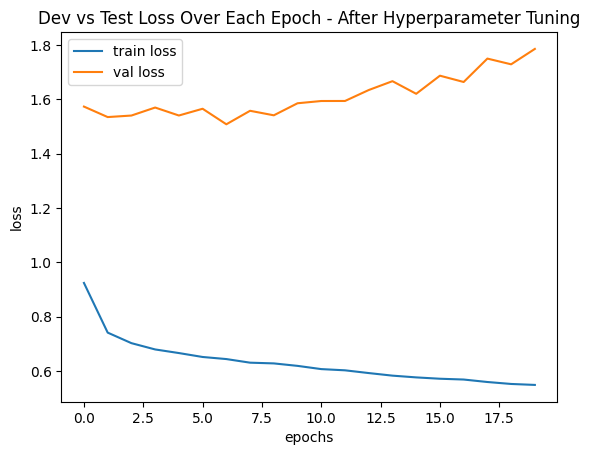

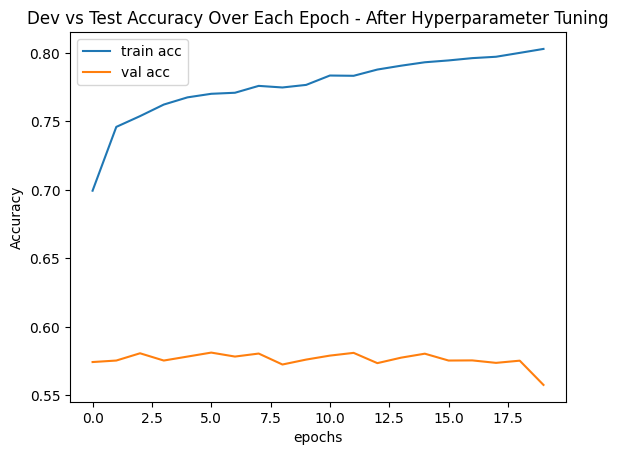

In [37]:
# Your code here
import time

#TODO: probably have to encode the y's 
y_dev_one_hot = to_categorical(y_dev, num_classes=num_labels)
y_train_one_hot = to_categorical(y_train, num_classes=num_labels)
y_test_one_hot = to_categorical(y_test, num_classes=num_labels)

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# for hyperparameter tuning
batch_sizes = [32, 64, 128]
val_accs = []
histories = []

print("-- Starting Hyperparmeter Tuning --")
start = time.perf_counter()
for bat in batch_sizes:
    history_callback = cnn.fit(
                        X_train, 
                        y_train_one_hot, 
                        batch_size=bat,
                        epochs=20,
                        verbose="auto",
                        validation_data=(X_val, y_val_one_hot)
                        )
    hist = pd.DataFrame(history_callback.history)
    val_acc = hist["val_accuracy"][19]
    val_accs.append(val_acc)
    histories.append(history_callback)

end = time.perf_counter()

print("Time to tuning hyperparmeters (s): \t", end-start)
print("Time to tuning hyperparmeters (m): \t", (end-start)/60)

print("Tested Batch Sizes: \t", batch_sizes)
print("Validation Accuracies: \t", val_accs)
best_batch_size = batch_sizes[np.argmax(val_accs)]
print("Best Batch Size: ", best_batch_size)

# Plot the graphs for the best hyperparameter 
hist = pd.DataFrame(histories[np.argmax(val_accs)].history)
plt.plot(hist.index, hist["loss"], label="train loss")
plt.plot(hist.index, hist["val_loss"], label="val loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Train vs Validation Loss Over Each Epoch - Best Batch Size")
plt.legend()
plt.show()

plt.plot(hist.index, hist["accuracy"], label="train acc")
plt.plot(hist.index, hist["val_accuracy"], label="val acc")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.title("Train vs Validation Accuracy Over Each Epoch - Best Batch Size")
plt.show()

# Train the final model with best hyperparameters
print("-- Training Main Model --")
start = time.perf_counter()
history_callback = cnn.fit(
                        x_dev, 
                        y_dev_one_hot, 
                        batch_size=best_batch_size,
                        epochs=20,
                        verbose="auto",
                        validation_data=(x_test, y_test_one_hot)
                        )

end = time.perf_counter()
print("Time to train model (s): \t", end-start)
print("Time to train model (m): \t", (end-start)/60)
          
# Plot graph for accuracies on test set
hist = pd.DataFrame(history_callback.history)
plt.plot(hist.index, hist["loss"], label="train loss")
plt.plot(hist.index, hist["val_loss"], label="val loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Dev vs Test Loss Over Each Epoch - After Hyperparameter Tuning")
plt.legend()
plt.show()

plt.plot(hist.index, hist["accuracy"], label="train acc")
plt.plot(hist.index, hist["val_accuracy"], label="val acc")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.title("Dev vs Test Accuracy Over Each Epoch - After Hyperparameter Tuning")
plt.show()

In [38]:
score = cnn.evaluate(x_test, y_test_one_hot, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 1.786
Test Accuracy: 0.558


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above. 

Plot a separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch 

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

-- Training Dropout Model --
Epoch 1/20
1563/1563 [==============================] - 28s 17ms/step - loss: 1.7575 - accuracy: 0.3523 - val_loss: 1.5705 - val_accuracy: 0.4463
Epoch 2/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4911 - accuracy: 0.4622 - val_loss: 1.5188 - val_accuracy: 0.4771
Epoch 3/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3904 - accuracy: 0.5004 - val_loss: 1.3476 - val_accuracy: 0.5167
Epoch 4/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3379 - accuracy: 0.5250 - val_loss: 1.3058 - val_accuracy: 0.5587
Epoch 5/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3087 - accuracy: 0.5358 - val_loss: 1.2944 - val_accuracy: 0.5626
Epoch 6/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2802 - accuracy: 0.5487 - val_loss: 1.2572 - val_accuracy: 0.5790
Epoch 7/20
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2622 - accuracy

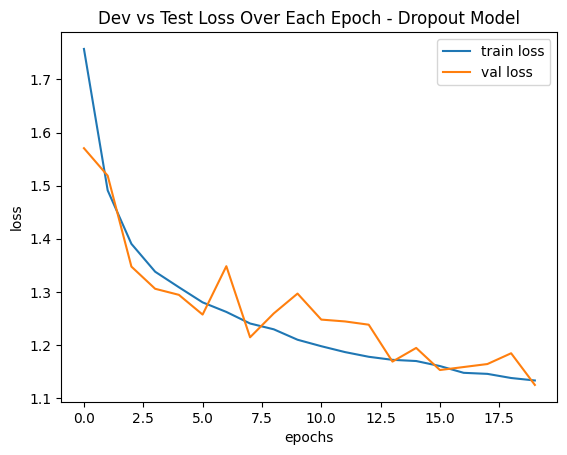

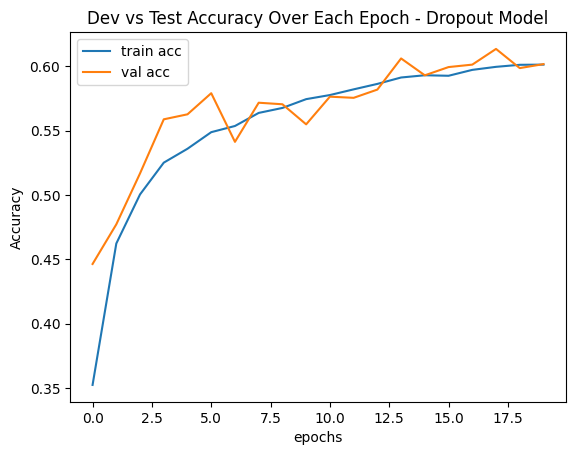

-- Training Batch Normalization Model --
Epoch 1/20
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5186 - accuracy: 0.4599 - val_loss: 1.4147 - val_accuracy: 0.4975
Epoch 2/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2413 - accuracy: 0.5619 - val_loss: 1.4281 - val_accuracy: 0.5143
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1341 - accuracy: 0.6011 - val_loss: 1.1523 - val_accuracy: 0.5902
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0623 - accuracy: 0.6265 - val_loss: 1.0471 - val_accuracy: 0.6333
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0063 - accuracy: 0.6458 - val_loss: 1.1703 - val_accuracy: 0.5905
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9604 - accuracy: 0.6612 - val_loss: 1.0687 - val_accuracy: 0.6279
Epoch 7/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.916

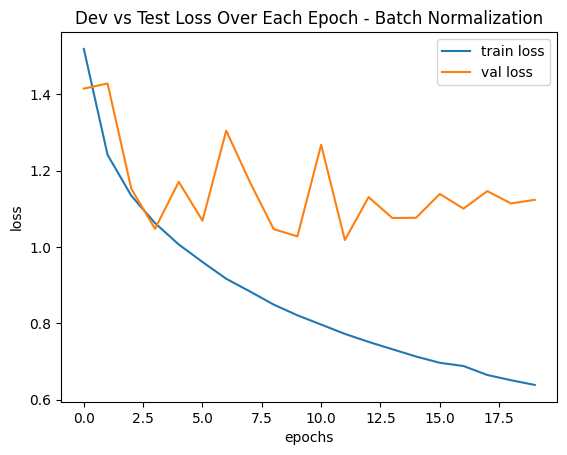

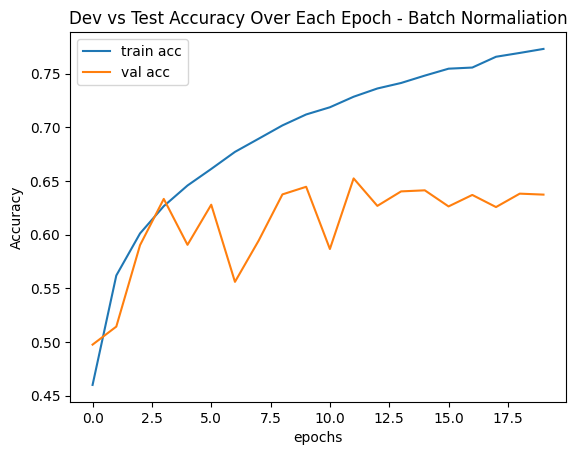

In [39]:
# Your code here
# For simplicity, let just use whatever batch size the last model found to be best
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Dense
from keras.models import Sequential

cnn_dropout = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', padding="valid", strides=(1,1), input_shape=input_shape),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu', padding="valid"),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(120, kernel_size=(5, 5), activation='relu', padding="valid"),
    Dropout(0.3),
    Flatten(),
    Dense(84, activation='relu'),
    Dropout(0.3),
    Dense(output_size, activation='softmax'),
])
cnn_dropout.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

cnn_batch_norm = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', padding="valid", strides=(1,1), input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu', padding="valid"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(120, kernel_size=(5, 5), activation='relu', padding="valid"),
    BatchNormalization(),
    Flatten(),
    Dense(84, activation='relu'),
    BatchNormalization(),
    Dense(output_size, activation='softmax'),     
])
cnn_batch_norm.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

""" 
Note: It says to display/monitor training and validation loss.
      Though, since it is not doig hyperparameter tuning, I have choosen to just train on my entire 
      dev set, using the test set as a means for evaluationn.
"""
print("-- Training Dropout Model --")
start = time.perf_counter()
history_callback_drop = cnn_dropout.fit(
                        x_dev, 
                        y_dev_one_hot, 
                        batch_size=best_batch_size,
                        epochs=20,
                        verbose="auto",
                        validation_data=(x_test, y_test_one_hot)
                        )

end = time.perf_counter()
print("Time to train model (s): \t", end-start)
print("Time to train model (m): \t", (end-start)/60)

score_dropout = cnn_dropout.evaluate(x_test, y_test_one_hot, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

hist = pd.DataFrame(history_callback_drop.history)
plt.plot(hist.index, hist["loss"], label="train loss")
plt.plot(hist.index, hist["val_loss"], label="val loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Dev vs Test Loss Over Each Epoch - Dropout Model")
plt.legend()
plt.show()

plt.plot(hist.index, hist["accuracy"], label="train acc")
plt.plot(hist.index, hist["val_accuracy"], label="val acc")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.title("Dev vs Test Accuracy Over Each Epoch - Dropout Model")
plt.show()

# ---------------------------------------------------------------- #
print("-- Training Batch Normalization Model --")
start = time.perf_counter()
history_callback_bn = cnn_batch_norm.fit(
                        x_dev, 
                        y_dev_one_hot, 
                        batch_size=best_batch_size,
                        epochs=20,
                        verbose="auto",
                        validation_data=(x_test, y_test_one_hot)
                        )

end = time.perf_counter()
print("Time to train model (s): \t", end-start)
print("Time to train model (m): \t", (end-start)/60)

score_bn = cnn_batch_norm.evaluate(x_test, y_test_one_hot, verbose=0)
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

hist = pd.DataFrame(history_callback_bn.history)
plt.plot(hist.index, hist["loss"], label="train loss")
plt.plot(hist.index, hist["val_loss"], label="val loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Dev vs Test Loss Over Each Epoch - Batch Normalization")
plt.legend()
plt.show()

plt.plot(hist.index, hist["accuracy"], label="train acc")
plt.plot(hist.index, hist["val_accuracy"], label="val acc")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.title("Dev vs Test Accuracy Over Each Epoch - Batch Normaliation")
plt.show()


In [40]:
print("Final Accuracy Scores For Three Models:")
print("Test Accuracy Regular Model: {:.3f}".format(score[1]))
print("Test Accuracy Dropout Model: {:.3f}".format(score_dropout[1]))
print("Test Accuracy Batch Norm Model: {:.3f}".format(score_bn[1]))

Final Accuracy Scores For Three Models:
Test Accuracy Regular Model: 0.558
Test Accuracy Dropout Model: 0.602
Test Accuracy Batch Norm Model: 0.637


In [42]:
""" 
Both of the overfitting techniques worked well to combat the overfitting.  You can tell since the val scores are closer to the training scores than the original model.
Overall, it looks like the batch normalization model had the best final test score (accuracy)
"""

' \nBoth of the overfitting techniques worked well to combat the overfitting.  You can tell since the val scores are closer to the training scores than the original model.\nOverall, it looks like the batch normalization model had the best final test score (accuracy)\n'